In [1]:
import pandas as pd
import numpy as np

In [3]:
from baseball_utilities.data import *
fangraphs_batting_min_400_2024 = get_table("fangraphs_batting_min_400_2024")
pbp_2024 = get_table("statcast_2024")

In [2]:
from baseball_utilities.display import set_pandas_display_all
set_pandas_display_all()

In [55]:
swings_2024 = pd.read_csv("swings_2024_outlier_added.csv", index_col = 0)

In [59]:
swings_2024

,pitch_type,game_date,release_speed,player_name,batter,pitcher,events,description,des,zone,game_type,stand,p_throws,bb_type,balls,strikes,game_year,plate_x,plate_z,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,arm_angle,bat_speed,swing_length,bat_speed_pred,swing_length_pred,bat_speed_residual,swing_length_residual,bat_speed_residual_scaled,swing_length_residual_scaled,outlier_prob
0,FF,2024-09-30,94.2,"Díaz, Edwin",621566,621242,field_out,hit_into_play,Matt Olson pops out to shortstop Francisco Lindor.,12.0,R,L,R,popup,0,0,2024,0.84,2.93,76.1,58.0,96.5,2251.0,7.5,0.037,0.039,0.0,17.8,77.4,7.0,72.630213,6.851235,4.769787,0.148765,0.778840,0.268969,0.001757
1,CU,2024-09-30,86.4,"Johnson, Pierce",596019,572955,home_run,hit_into_play,Francisco Lindor homers (33) on a fly ball to center field. Starling Marte scores.,8.0,R,L,R,fly_ball,0,0,2024,0.15,1.72,107.2,35.0,86.2,3025.0,5.9,0.791,1.621,2.0,39.4,80.2,8.1,73.566324,7.948831,6.633676,0.151169,1.083187,0.273316,0.001764
2,SL,2024-09-30,89.7,"Díaz, Edwin",542303,621242,strikeout,swinging_strike,Marcell Ozuna strikes out swinging.,6.0,R,R,R,NaN,3,2,2024,0.55,2.52,NaN,NaN,92.1,2143.0,7.3,NaN,0.000,0.0,25.3,78.4,8.1,74.373570,7.287232,4.026430,0.812768,0.657460,1.469494,0.000154
3,SL,2024-09-30,89.5,"Díaz, Edwin",542303,621242,NaN,swinging_strike,Marcell Ozuna strikes out swinging.,14.0,R,R,R,NaN,2,1,2024,0.94,1.28,NaN,NaN,91.7,2199.0,7.3,NaN,NaN,NaN,22.1,79.5,8.5,69.598224,8.102444,9.901776,0.397556,1.616823,0.718785,0.002070
4,FF,2024-09-30,96.9,"Díaz, Edwin",542303,621242,NaN,foul,Marcell Ozuna strikes out swinging.,5.0,R,R,R,NaN,1,0,2024,-0.18,2.89,NaN,86.0,99.3,2254.0,7.6,NaN,NaN,NaN,18.4,77.4,8.0,73.445847,6.833112,3.954153,1.166888,0.645658,2.109747,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196956,SI,2024-04-03,92.3,"Keller, Mitch",682928,656605,field_out,hit_into_play,CJ Abrams pops out to third baseman Ke'Bryan Hayes in foul territory.,2.0,R,L,R,popup,3,1,2024,0.15,3.29,71.2,63.0,92.8,2317.0,6.5,0.003,0.003,0.0,31.7,64.2,6.2,67.746497,6.518272,-3.546497,-0.318272,-0.579094,-0.575440,0.033400
196957,FF,2024-04-03,92.4,"Keller, Mitch",682928,656605,NaN,foul,CJ Abrams pops out to third baseman Ke'Bryan Hayes in foul territory.,2.0,R,L,R,NaN,1,0,2024,-0.03,3.10,71.5,35.0,93.0,2440.0,6.7,NaN,NaN,NaN,31.5,66.8,6.0,69.811933,6.778951,-3.011933,-0.778951,-0.491807,-1.408353,0.207797
196958,CH,2024-04-03,83.3,"Williams, Trevor",668804,592866,field_out,hit_into_play,Bryan Reynolds lines out to right fielder Lane Thomas.,5.0,R,L,R,line_drive,1,1,2024,-0.23,2.54,98.9,21.0,83.7,1469.0,6.7,0.343,0.439,0.0,15.5,70.9,7.2,71.598932,6.546403,-0.698932,0.653597,-0.114126,1.181711,0.000396
196959,CH,2024-04-03,82.5,"Williams, Trevor",665833,592866,strikeout,swinging_strike,Oneil Cruz strikes out swinging.,13.0,R,L,R,NaN,2,2,2024,-0.92,1.63,NaN,NaN,83.2,1395.0,6.7,NaN,0.000,0.0,14.8,82.1,8.5,73.092508,8.483885,9.007492,0.016115,1.470798,0.029137,0.007303


In [132]:
pbp_2024_copy = pbp_2024

In [83]:
shared_cols = list(set(pbp_2024_copy.columns).intersection(set(swings_2024.columns)))
shared_cols

['pitcher',
 'effective_speed',
 'arm_angle',
 'bb_type',
 'events',
 'bat_speed',
 'estimated_woba_using_speedangle',
 'game_date',
 'batter',
 'balls',
 'pitch_type',
 'p_throws',
 'outlier_prob',
 'estimated_ba_using_speedangle',
 'release_extension',
 'strikes',
 'stand',
 'plate_z',
 'launch_angle',
 'launch_speed',
 'woba_value',
 'zone',
 'player_name',
 'game_type',
 'description',
 'des',
 'release_speed',
 'release_spin_rate',
 'game_year',
 'plate_x',
 'swing_length']

In [133]:
columns_to_exclude = ["bat_speed_pred", "swing_length_pred", "bat_speed_residual", "swing_length_residual",
                      "bat_speed_residual_scaled", "swing_length_residual_scaled", "outlier_prob"]
columns_to_merge = [col for col in swings_2024.columns if col not in columns_to_exclude]

for col in columns_to_merge:
    pbp_2024_copy[col] = pbp_2024_copy[col].astype(swings_2024[col].dtype)

pbp_2024_copy["game_date"] = pd.to_datetime(pbp_2024_copy["game_date"])
swings_2024["game_date"] = pd.to_datetime(swings_2024["game_date"])

pbp_2024_copy = pbp_2024_copy.merge(
    swings_2024[columns_to_merge + ["outlier_prob"]],
    on = columns_to_merge,
    how = "left"
)

In [89]:
pbp_2024_copy

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,outlier_prob
0,SL,2024-09-14,81.0,-1.67,6.45,"Wacha, Michael",669707,608379,None,ball,None,None,None,None,14.0,Jared Triolo walks.,R,R,R,PIT,KC,B,NaN,None,1,0,2024,-0.04,-0.05,1.56,2.41,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,7.403313,-117.780100,-2.247925,-1.884900,24.047108,-32.380467,3.41,1.48,NaN,NaN,NaN,82.0,2145.0,7.1,745448,666023,521692,686681,672580,677951,669004,664728,624428,53.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,2,Slider,0,1,0,1,1,0,0,1,Standard,Standard,35.0,0.000,0.069,NaN,NaN,NaN,-0.069,NaN,-1,-1,0.430,0.430,32,26,33,26,1,0,6.0,1.0,6.0,1.0,3.55,0.04,0.04,52.0,Jared Triolo,NaN
1,ST,2024-09-10,81.4,-3.30,5.14,"Kelly, Zack",656775,677161,None,ball,None,None,None,None,13.0,Cedric Mullins walks.,R,L,R,BOS,BAL,B,NaN,None,2,2,2024,1.61,-0.12,-1.10,1.40,NaN,NaN,NaN,1,9,Top,NaN,NaN,None,None,None,None,1.865073,-118.564311,-1.522479,14.707421,24.400078,-33.232928,3.31,1.51,NaN,NaN,NaN,82.6,2849.0,7.2,746907,657136,671213,663853,646240,678882,641933,680776,608701,53.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,5,Sweeper,3,5,5,3,5,3,5,3,Infield shade,Standard,58.0,0.000,0.108,NaN,NaN,NaN,-0.108,NaN,-2,2,0.078,0.922,29,29,29,30,1,4,2.0,1.0,2.0,1.0,3.58,-1.61,1.61,32.0,Cedric Mullins,NaN
2,SI,2024-09-05,92.6,1.95,5.15,"Bummer, Aaron",641857,607481,None,ball,None,None,None,None,13.0,Ryan McMahon walks.,R,L,L,ATL,COL,B,NaN,None,2,0,2024,1.42,0.06,-1.67,2.00,NaN,678662.0,NaN,1,8,Top,NaN,NaN,None,None,None,None,-12.345133,-134.229757,-2.298964,19.950608,31.096201,-31.158855,3.33,1.54,NaN,NaN,NaN,92.2,2273.0,6.4,747073,669221,621566,663897,570482,606115,657656,671739,624585,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,3,Sinker,1,3,3,1,3,1,3,1,Strategic,Standard,113.0,0.000,0.083,NaN,NaN,NaN,-0.083,NaN,-2,2,0.118,0.882,30,29,31,30,1,3,4.0,1.0,2.0,1.0,2.64,1.42,1.42,7.5,Ryan McMahon,NaN
3,SI,2024-09-03,95.6,-2.80,5.41,"Peguero, Elvis",671056,665625,None,ball,None,None,None,None,11.0,Iván Herrera walks.,R,R,R,MIL,STL,B,NaN,None,0,0,2024,-1.25,0.32,-1.63,2.69,NaN,687363.0,NaN,0,12,Top,NaN,NaN,None,None,None,None,5.978284,-139.134348,-2.272885,-17.553859,31.340162,-27.705557,3.24,1.46,NaN,NaN,NaN,96.7,1657.0,6.9,745944,661388,656555,668930,687401,642715,694192,663368,686217,53.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,1,Sinker,4,4,4,4,4,4,4,4,Infield shade,Standard,244.0,0.000,0.038,NaN,NaN,NaN,-0.038,NaN,0,0,0.500,0.500,27,24,27,24,1,0,18.0,2.0,5.0,1.0,2.17,1.25,1.25,20.7,Iván Herrera,NaN
4,FC,2024-09-02,89.6,-0.94,5.78,"Anderson, Chase",665742,502624,None,ball,None,None,None,None,12.0,Juan Soto walks.,R,L,R,TEX,NYY,B,NaN,None,

In [101]:
pbp_2024_copy["outlier_prob"].sum(skipna=True)

18003.120346551277

In [102]:
swings_2024["outlier_prob"].sum(skipna=True)

18003.12034655127

In [5]:
pbp_2024_copy = pbp_2024_copy.sort_values(["game_date", "game_pk", "at_bat_number", "pitch_number"])

In [6]:
pbp_2024_copy["pitch_number_in_game"] = (
    pbp_2024_copy.groupby('game_pk').cumcount() + 1
)

In [7]:
np.random.seed(100)
random_game_pk = pbp_2024_copy['game_pk'].sample(1).iloc[0]

In [56]:
random_game_pk

np.int64(746484)

In [8]:
random_game_rows = pbp_2024_copy[pbp_2024_copy["game_pk"] == random_game_pk]

In [69]:
random_game_rows

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,pitch_number_in_game
590492,FF,2024-04-27,94.6,-1.79,5.63,"Mize, Casey",672580,663554,single,hit_into_play,None,None,None,None,9.0,Maikel Garcia singles on a sharp line drive to right fielder Kerry Carpenter.,R,R,R,DET,KC,X,9.0,line_drive,0,0,2024,-0.64,1.32,0.49,2.26,NaN,NaN,NaN,0,1,Top,161.84,123.68,None,None,None,None,7.507323,-137.501622,-6.124657,-9.821337,30.505006,-14.274925,3.67,1.76,210.0,104.0,9.0,96.1,2251.0,7.2,746484,668670,679529,690993,656716,595879,682985,672761,681481,53.29,0.737,0.681000,0.90,1.0,1.0,0.0,4.0,1,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Standard,209.0,-0.036,0.448,72.6,7.2,0.833,-0.448,104.0,0,0,0.500,0.500,27,24,27,24,1,0,6.0,1.0,7.0,1.0,1.24,0.64,0.64,47.6,Maikel García,1
590491,FF,2024-04-27,95.1,-1.82,5.62,"Mize, Casey",677951,663554,None,ball,None,None,None,None,14.0,Bobby Witt Jr. singles on a sharp line drive to right fielder Kerry Carpenter. Maikel Garcia to 3rd.,R,R,R,DET,KC,B,NaN,None,0,0,2024,-0.27,1.47,0.40,0.70,NaN,NaN,672580.0,0,1,Top,NaN,NaN,None,None,None,None,6.548196,-138.084301,-10.765258,-4.823293,27.876947,-11.195039,3.43,1.55,NaN,NaN,NaN,97.1,2328.0,7.3,746484,668670,679529,690993,656716,595879,682985,672761,681481,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,4-Seam Fastball,0,0,0,0,0,0,0,0,Standard,Strategic,212.0,0.000,0.042,NaN,NaN,NaN,-0.042,NaN,0,0,0.464,0.536,27,24,27,24,1,0,6.0,1.0,7.0,1.0,1.04,0.27,0.27,50.3,Bobby Witt,2
590490,SL,2024-04-27,88.0,-2.17,5.42,"Mize, Casey",677951,663554,None,ball,None,None,None,None,14.0,Bobby Witt Jr. singles on a sharp line drive to right fielder Kerry Carpenter. Maikel Garcia to 3rd.,R,R,R,DET,KC,B,NaN,None,1,0,2024,0.08,0.28,0.83,1.15,NaN,NaN,672580.0,0,1,Top,NaN,NaN,None,None,None,None,7.269637,-128.091924,-5.004150,-0.450435,23.551220,-28.340224,3.53,1.66,NaN,NaN,NaN,90.1,2327.0,7.3,746484,668670,679529,690993,656716,595879,682985,672761,681481,53.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,Slider,0,0,0,0,0,0,0,0,Standard,Strategic,140.0,0.000,0.068,NaN,NaN,NaN,-0.068,NaN,0,0,0.464,0.536,27,24,27,24,1,0,6.0,1.0,7.0,1.0,2.64,-0.08,-0.08,43.1,Bobby Witt,3
590489,FF,2024-04-27,97.1,-1.89,5.58,"Mize, Casey",677951,663554,None,called_strike,None,None,None,None,9.0,Bobby Witt Jr. singles on a sharp line drive to right fielder Kerry Carpenter. Maikel Garcia to 3rd.,R,R,R,DET,KC,S,NaN,None,2,0,2024,-0.96,1.04,0.80,2.18,NaN,NaN,672580.0,0,1,Top,NaN,NaN,None,None,None,None,9.601629,-141.142793,-6.077676,-14.896955,30.022238,-17.084149,3.49,1.62,NaN,NaN,NaN,99.3,2394.0,7.4,746484,668670,679529,690993,656716,595879,682985,6727

In [65]:
def add_pitch_number(df):
    df = df.sort_values(["game_date", "game_pk", "at_bat_number", "pitch_number"])
    df["pitch_number_in_game"] = (
        df.groupby('game_pk').cumcount() + 1
    )
    return df

In [9]:
def add_swing_season(df):
    df = df.sort_values(["batter", "game_date", "game_pk", "at_bat_number", "pitch_number"])
    df['swing_number_season'] = (df[df['is_swing'] == True].groupby("batter").cumcount() + 1)

In [136]:
pbp_2024_copy['is_swing'] = (pbp_2024_copy['bat_speed'].notna() & pbp_2024_copy['swing_length'].notna())

In [91]:
pbp_2024_copy

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,outlier_prob,is_swing
0,SL,2024-09-14,81.0,-1.67,6.45,"Wacha, Michael",669707,608379,None,ball,None,None,None,None,14.0,Jared Triolo walks.,R,R,R,PIT,KC,B,NaN,None,1,0,2024,-0.04,-0.05,1.56,2.41,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,7.403313,-117.780100,-2.247925,-1.884900,24.047108,-32.380467,3.41,1.48,NaN,NaN,NaN,82.0,2145.0,7.1,745448,666023,521692,686681,672580,677951,669004,664728,624428,53.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,2,Slider,0,1,0,1,1,0,0,1,Standard,Standard,35.0,0.000,0.069,NaN,NaN,NaN,-0.069,NaN,-1,-1,0.430,0.430,32,26,33,26,1,0,6.0,1.0,6.0,1.0,3.55,0.04,0.04,52.0,Jared Triolo,NaN,False
1,ST,2024-09-10,81.4,-3.30,5.14,"Kelly, Zack",656775,677161,None,ball,None,None,None,None,13.0,Cedric Mullins walks.,R,L,R,BOS,BAL,B,NaN,None,2,2,2024,1.61,-0.12,-1.10,1.40,NaN,NaN,NaN,1,9,Top,NaN,NaN,None,None,None,None,1.865073,-118.564311,-1.522479,14.707421,24.400078,-33.232928,3.31,1.51,NaN,NaN,NaN,82.6,2849.0,7.2,746907,657136,671213,663853,646240,678882,641933,680776,608701,53.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,5,Sweeper,3,5,5,3,5,3,5,3,Infield shade,Standard,58.0,0.000,0.108,NaN,NaN,NaN,-0.108,NaN,-2,2,0.078,0.922,29,29,29,30,1,4,2.0,1.0,2.0,1.0,3.58,-1.61,1.61,32.0,Cedric Mullins,NaN,False
2,SI,2024-09-05,92.6,1.95,5.15,"Bummer, Aaron",641857,607481,None,ball,None,None,None,None,13.0,Ryan McMahon walks.,R,L,L,ATL,COL,B,NaN,None,2,0,2024,1.42,0.06,-1.67,2.00,NaN,678662.0,NaN,1,8,Top,NaN,NaN,None,None,None,None,-12.345133,-134.229757,-2.298964,19.950608,31.096201,-31.158855,3.33,1.54,NaN,NaN,NaN,92.2,2273.0,6.4,747073,669221,621566,663897,570482,606115,657656,671739,624585,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,3,Sinker,1,3,3,1,3,1,3,1,Strategic,Standard,113.0,0.000,0.083,NaN,NaN,NaN,-0.083,NaN,-2,2,0.118,0.882,30,29,31,30,1,3,4.0,1.0,2.0,1.0,2.64,1.42,1.42,7.5,Ryan McMahon,NaN,False
3,SI,2024-09-03,95.6,-2.80,5.41,"Peguero, Elvis",671056,665625,None,ball,None,None,None,None,11.0,Iván Herrera walks.,R,R,R,MIL,STL,B,NaN,None,0,0,2024,-1.25,0.32,-1.63,2.69,NaN,687363.0,NaN,0,12,Top,NaN,NaN,None,None,None,None,5.978284,-139.134348,-2.272885,-17.553859,31.340162,-27.705557,3.24,1.46,NaN,NaN,NaN,96.7,1657.0,6.9,745944,661388,656555,668930,687401,642715,694192,663368,686217,53.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,1,Sinker,4,4,4,4,4,4,4,4,Infield shade,Standard,244.0,0.000,0.038,NaN,NaN,NaN,-0.038,NaN,0,0,0.500,0.500,27,24,27,24,1,0,18.0,2.0,5.0,1.0,2.17,1.25,1.25,20.7,Iván Herrera,NaN,False
4,FC,2024-09-02,89.6,-0.94,5.78,"Anderson, Chase",665742,502624,None,ball,None,None,None,None,12.0,Juan Soto

In [134]:
pbp_2024_copy = pbp_2024_copy.sort_values(["batter", "game_date", "game_pk", "at_bat_number", "pitch_number"])

In [137]:
pbp_2024_copy['swing_number_season'] = pbp_2024_copy[pbp_2024_copy['is_swing'] == True].groupby("batter").cumcount() + 1

In [138]:
pbp_2024_copy['bb_number_season'] =  (pbp_2024_copy[pbp_2024_copy['bb_type'].notna()].groupby("batter")
                                        .cumcount() + 1)

In [139]:
pbp_2024_copy['fb_number_season'] = (pbp_2024_copy[pbp_2024_copy["bb_type"] == "fly_ball"].groupby("batter")
                                         .cumcount() + 1)

In [89]:
pbp_2024_copy[["bat_speed", "swing_length", "estimated_slg_using_speedangle"]].isna().sum()

bat_speed                         392156
swing_length                      392156
estimated_slg_using_speedangle    585125
dtype: int64

In [96]:
pbp_2024_copy.loc[(pbp_2024_copy['bb_type'].notna()) & (pbp_2024_copy["estimated_slg_using_speedangle"].isna())].shape[0]

378

In [97]:
nicky_lopez = pbp_2024_copy[(pbp_2024_copy["batter"] == 670032)]

In [134]:
nicky_lopez["fb_number_season"].max()

np.float64(65.0)

In [98]:
nicky_lopez_first_game = nicky_lopez[nicky_lopez["game_pk"] ==746821].sort_values(["at_bat_number", "pitch_number"])

In [99]:
nicky_lopez_first_game

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,outlier_prob,is_swing,swing_number_season,bb_number_season,fb_number_season
705839,SI,2024-03-28,96.0,1.83,6.25,"Skubal, Tarik",670032,669373,None,called_strike,None,None,None,None,12.0,"Nicky Lopez grounds out, third baseman Andy Ibáñez to first baseman Spencer Torkelson.",R,L,L,CWS,DET,S,NaN,None,0,0,2024,1.19,1.12,0.53,3.23,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,-6.154774,-139.599724,-4.900455,17.006583,32.774176,-16.633224,2.87,1.36,NaN,NaN,NaN,96.0,2109.0,6.4,746821,668670,679529,690993,628451,595879,682985,678009,663837,54.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,Sinker,0,1,0,1,1,0,0,1,Standard,Standard,143.0,0.000,-0.037,NaN,NaN,NaN,0.037,NaN,-1,-1,0.430,0.430,27,29,28,29,1,0,NaN,NaN,8.0,2.0,1.37,1.19,1.19,47.9,Nicky Lopez,NaN,False,NaN,NaN,NaN
705837,FF,2024-03-28,97.4,1.98,6.32,"Skubal, Tarik",670032,669373,None,foul,None,None,None,None,12.0,"Nicky Lopez grounds out, third baseman Andy Ibáñez to first baseman Spencer Torkelson.",R,L,L,CWS,DET,S,NaN,None,0,1,2024,0.76,1.37,0.12,3.40,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,-6.728833,-141.547573,-5.441496,11.760043,33.803619,-12.667157,3.09,1.41,204.0,78.8,56.0,97.1,2319.0,6.3,746821,668670,679529,690993,628451,595879,682985,678009,663837,54.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,4-Seam Fastball,0,1,0,1,1,0,0,1,Standard,Standard,145.0,0.000,-0.054,NaN,NaN,NaN,0.054,88.0,-1,-1,0.430,0.430,27,29,28,29,1,0,NaN,NaN,8.0,2.0,1.04,0.76,0.76,46.0,Nicky Lopez,NaN,False,NaN,NaN,NaN
705836,SI,2024-03-28,98.1,1.84,6.22,"Skubal, Tarik",670032,669373,None,foul,None,None,None,None,3.0,"Nicky Lopez grounds out, third baseman Andy Ibáñez to first baseman Spencer Torkelson.",R,L,L,CWS,DET,S,NaN,None,0,2,2024,1.20,1.27,0.32,2.83,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,-6.874494,-142.612748,-6.647954,17.905961,31.609424,-13.476679,3.09,1.41,216.0,73.8,27.0,98.4,2219.0,6.4,746821,668670,679529,690993,628451,595879,682985,678009,663837,54.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,3,Sinker,0,1,0,1,1,0,0,1,Standard,Standard,138.0,0.000,0.000,NaN,NaN,NaN,0.000,88.0,-1,-1,0.430,0.430,27,29,28,29,1,0,NaN,NaN,8.0,2.0,1.10,1.20,1.20,44.5,Nicky Lopez,NaN,False,NaN,NaN,NaN
705835,SI,2024-03-28,98.4,1.98,6.22,"Skubal, Tarik",670032,669373,None,ball,None,None,None,None,12.0,"Nicky Lopez grounds out, third baseman Andy Ibáñez to first baseman Spencer Torkelson.",R,L,L,CWS,DET,B,NaN,None,0,2,2024,1.50,0.93,1.40,4.44,NaN,NaN,NaN,0,3,Bot,NaN,NaN,None,None,None,None,-5.040213,-143.191198,-1.526929,21.773268,33.786949,-19.244098,2.98,1.33,NaN,NaN,NaN,98.3,2148.0,6.3,746821

In [ ]:
def add_rolling_fb_percent(df, window=20):
    df = df.sort_values(["batter", "game_date", "game_pk", "at_bat_number", "pitch_number"])
    
    df["is_fb"] = (df["bb_type"] == "fly_ball").astype(int)
    
    df["rolling_fb_percent"] = (
        df.groupby("batter")["is_fb"]
        .transform(lambda x: x.rolling(window=window, min_periods=1).mean())
    )
    
    return df

In [140]:
bb_2024 = pbp_2024[pbp_2024_copy["bb_type"].notna()].copy()

bb_2024["is_fb"] = (bb_2024["bb_type"].isin(["fly_ball", "pop_up"])).astype(int)

bb_2024 = bb_2024.sort_values(["batter", "game_date", "game_pk", "at_bat_number", "pitch_number"])

#pbp_2024_copy["is_fb"] 

/var/folders/s2/nj72w9kx55v5zn8_gfnr84qr0000gn/T/ipykernel_2291/3406805450.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bb_2024 = pbp_2024[pbp_2024_copy["bb_type"].notna()].copy()


In [141]:
fb_game_2024 = (bb_2024.groupby(["batter", "game_date"]).agg(fb_hit = ("is_fb", "sum"),
                                                            bb_num = ("type", "count")
                                                           ).reset_index())
fb_game_2024["fb_pct"] = fb_game_2024["fb_hit"] / fb_game_2024["bb_num"]

In [142]:
outlier_by_game = (pbp_2024_copy[pbp_2024_copy["is_swing"]].groupby(["batter", "game_pk"]).agg(
        avg_outlier_prob=("outlier_prob", "mean"),
        game_date=("game_date", "first")
    )
    .reset_index()
)

In [143]:
outlier_by_game = outlier_by_game.sort_values(["batter", "game_date"])

In [144]:
outlier_by_game["rolling_outlier_prob"] = (
    outlier_by_game.groupby("batter")["avg_outlier_prob"]
    .transform(lambda x: x.rolling(window=50, min_periods=1).mean())
)

In [38]:
fb_game_2024

,batter,game_date,fb_hit,bb_num,fb_pct
0,444482,2024-05-22,0,1,0.00
1,444482,2024-05-23,0,4,0.00
2,444482,2024-05-25,1,1,1.00
3,444482,2024-05-27,0,1,0.00
4,444482,2024-05-31,1,1,1.00
...,...,...,...,...,...
45750,808982,2024-05-04,1,4,0.25
45751,808982,2024-05-05,2,5,0.40
45752,808982,2024-05-06,2,4,0.50
45753,808982,2024-05-07,0,4,0.00


In [145]:
fb_game_2024 = fb_game_2024.sort_values(["batter", "game_date"])

In [146]:
fb_game_2024["rolling_fb_percent"] = (
    fb_game_2024.groupby("batter")["fb_pct"]
    .transform(lambda x: x.rolling(window=26, min_periods=1).mean())
)

In [36]:
pbp_2024_copy

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,pitch_number_in_game,is_swing,swing_number_season,is_fb
492163,FC,2024-05-22,87.4,-1.98,6.24,"Martinez, Nick",444482,607259,None,called_strike,None,None,None,None,8.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,S,NaN,None,0,0,2024,0.22,0.88,0.03,1.65,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,4.343683,-127.252854,-6.787940,1.743279,21.349513,-21.448593,3.60,1.62,NaN,NaN,NaN,87.2,2407.0,5.7,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,Cutter,1,1,1,1,1,1,1,1,Infield shade,Standard,205.0,0.000,-0.035,NaN,NaN,NaN,0.035,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,2.05,-0.22,0.22,52.6,David Peralta,30,False,NaN,0
492162,FF,2024-05-22,91.9,-1.69,6.32,"Martinez, Nick",444482,607259,None,ball,None,None,None,None,12.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,B,NaN,None,0,1,2024,-0.09,1.40,1.34,3.71,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,7.764984,-133.695941,-3.798235,-2.584433,26.378684,-14.685001,3.57,1.84,NaN,NaN,NaN,91.2,2338.0,5.7,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,4-Seam Fastball,1,1,1,1,1,1,1,1,Infield shade,Standard,202.0,0.000,0.036,NaN,NaN,NaN,-0.036,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,1.28,0.09,-0.09,58.3,David Peralta,31,False,NaN,0
492161,CH,2024-05-22,79.8,-1.71,6.39,"Martinez, Nick",444482,607259,None,ball,None,None,None,None,13.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,B,NaN,None,1,1,2024,-0.69,0.54,-0.34,0.99,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,4.275889,-116.182158,-6.192393,-7.060224,19.446275,-26.374394,3.70,1.87,NaN,NaN,NaN,79.4,2136.0,5.8,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,Changeup,1,1,1,1,1,1,1,1,Infield shade,Standard,242.0,0.000,0.041,NaN,NaN,NaN,-0.041,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,3.00,0.69,-0.69,60.6,David Peralta,32,False,NaN,0
492160,FC,2024-05-22,89.1,-1.79,6.25,"Martinez, Nick",444482,607259,None,swinging_strike,None,None,None,None,14.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,S,NaN,None,2,1,2024,0.17,0.92,1.30,1.93,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,7.131608,-129.642744,-6.539768,0.778353,21.614021,-20.726725,3.54,1.72,NaN,NaN,NaN,88.8,2444.0,5.6,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,4,Cutter,1,1,1,1,1,1,1,1,Infield shade,Standard,205.0,0.000,-0.060,75.8,7.3,NaN,0.060,NaN,0,0,0.436,0.564,33,36,34,3

In [147]:
pbp_2024_copy = pbp_2024_copy.merge(fb_game_2024[["batter", "game_date", "rolling_fb_percent"]],
    on=["batter", "game_date"],
    how="left"
)

In [148]:
pbp_2024_copy = pbp_2024_copy.merge(
    outlier_by_game[["batter", "game_pk", "rolling_outlier_prob"]],
    on=["batter", "game_pk"],
    how="left"
)

In [130]:
pbp_2024_copy

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,outlier_prob,is_swing,swing_number_season,bb_number_season,fb_number_season,rolling_outlier_prob_x,rolling_fb_percent,rolling_outlier_prob_y,rolling_outlier_prob
0,FC,2024-05-22,87.4,-1.98,6.24,"Martinez, Nick",444482,607259,None,called_strike,None,None,None,None,8.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,S,NaN,None,0,0,2024,0.22,0.88,0.03,1.65,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,4.343683,-127.252854,-6.787940,1.743279,21.349513,-21.448593,3.60,1.62,NaN,NaN,NaN,87.2,2407.0,5.7,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,Cutter,1,1,1,1,1,1,1,1,Infield shade,Standard,205.0,0.000,-0.035,NaN,NaN,NaN,0.035,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,2.05,-0.22,0.22,52.6,David Peralta,NaN,False,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,FF,2024-05-22,91.9,-1.69,6.32,"Martinez, Nick",444482,607259,None,ball,None,None,None,None,12.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,B,NaN,None,0,1,2024,-0.09,1.40,1.34,3.71,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,7.764984,-133.695941,-3.798235,-2.584433,26.378684,-14.685001,3.57,1.84,NaN,NaN,NaN,91.2,2338.0,5.7,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,4-Seam Fastball,1,1,1,1,1,1,1,1,Infield shade,Standard,202.0,0.000,0.036,NaN,NaN,NaN,-0.036,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,1.28,0.09,-0.09,58.3,David Peralta,NaN,False,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,CH,2024-05-22,79.8,-1.71,6.39,"Martinez, Nick",444482,607259,None,ball,None,None,None,None,13.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,B,NaN,None,1,1,2024,-0.69,0.54,-0.34,0.99,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,4.275889,-116.182158,-6.192393,-7.060224,19.446275,-26.374394,3.70,1.87,NaN,NaN,NaN,79.4,2136.0,5.8,746712,663886,668715,663697,600869,682829,674441,666181,605361,54.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,Changeup,1,1,1,1,1,1,1,1,Infield shade,Standard,242.0,0.000,0.041,NaN,NaN,NaN,-0.041,NaN,0,0,0.436,0.564,33,36,34,37,1,0,6.0,NaN,4.0,1.0,3.00,0.69,-0.69,60.6,David Peralta,NaN,False,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
3,FC,2024-05-22,89.1,-1.79,6.25,"Martinez, Nick",444482,607259,None,swinging_strike,None,None,None,None,14.0,David Peralta strikes out swinging.,R,L,R,CIN,SD,S,NaN,None,2,1,2024,0.17,0.92,1.30,1.93,NaN,592518.0,NaN,0,2,Top,NaN,NaN,None,None,None,None,7.131608,-129.642744,-6.539768,0.778353,21.614021,-20.726725,3.54,1.72,NaN,NaN,NaN,88.8,2444.0,5.6,746712,663886,668715,663697,600869,682829,6744

In [149]:
judge = pbp_2024_copy[pbp_2024_copy["batter"] == 592450]

In [150]:
judge

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,batter_name,outlier_prob,is_swing,swing_number_season,bb_number_season,fb_number_season,rolling_fb_percent,rolling_outlier_prob
89726,SI,2024-03-28,94.0,0.64,6.04,"Valdez, Framber",592450,664285,grounded_into_double_play,hit_into_play,None,None,None,None,8.0,"Aaron Judge grounds into a double play, third baseman Alex Bregman to second baseman Jose Altuve to first baseman José Abreu. Juan Soto out at 2nd. Aaron Judge out at 1st.",R,R,L,HOU,NYY,X,5.0,ground_ball,0,0,2024,1.07,0.39,-0.19,2.19,NaN,NaN,665742.0,1,1,Top,102.33,164.25,None,None,None,None,-4.502325,-136.686129,-5.073485,14.409416,32.401598,-26.347708,4.00,1.88,6.0,99.4,-20.0,93.6,2091.0,6.2,746418,673237,547989,514888,608324,665161,676801,676694,663656,54.26,0.16,0.149000,0.0,1.0,0.0,0.0,2.0,3,1,Sinker,0,0,0,0,0,0,0,0,Standard,Standard,140.0,0.050,-0.314,NaN,NaN,0.172,0.314,99.4,0,0,0.497,0.503,30,32,31,32,1,0,NaN,NaN,5.0,1.0,2.21,1.07,-1.07,43.1,Aaron Judge,NaN,False,NaN,1.0,NaN,0.0,NaN
89727,CU,2024-03-28,78.7,0.84,6.11,"Valdez, Framber",592450,664285,None,ball,None,None,None,None,12.0,Aaron Judge walks.,R,R,L,HOU,NYY,B,NaN,None,0,0,2024,-1.30,-0.90,1.21,3.22,NaN,NaN,NaN,0,4,Top,NaN,NaN,None,None,None,None,3.146209,-114.433559,2.255966,-11.950166,23.644823,-40.755376,4.00,1.94,NaN,NaN,NaN,77.0,2914.0,5.4,746418,673237,547989,514888,608324,665161,676801,676694,663656,55.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,1,Curveball,4,0,0,4,0,4,0,4,Standard,Standard,316.0,0.000,0.038,NaN,NaN,NaN,-0.038,NaN,4,-4,0.886,0.114,30,32,31,32,2,1,NaN,NaN,5.0,1.0,4.63,-1.30,1.30,44.7,Aaron Judge,NaN,False,NaN,NaN,NaN,0.0,NaN
89728,CH,2024-03-28,91.3,0.64,6.12,"Valdez, Framber",592450,664285,None,ball,None,None,None,None,13.0,Aaron Judge walks.,R,R,L,HOU,NYY,B,NaN,None,1,0,2024,1.64,0.11,-0.27,1.35,NaN,NaN,NaN,0,4,Top,NaN,NaN,None,None,None,None,-5.800943,-132.731487,-6.285323,20.578050,31.272639,-29.619739,4.02,1.99,NaN,NaN,NaN,90.6,1846.0,6.2,746418,673237,547989,514888,608324,665161,676801,676694,663656,54.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,2,Changeup,4,0,0,4,0,4,0,4,Standard,Standard,123.0,0.000,0.069,NaN,NaN,NaN,-0.069,NaN,4,-4,0.886,0.114,30,32,31,32,2,1,NaN,NaN,5.0,1.0,2.65,1.64,-1.64,46.6,Aaron Judge,NaN,False,NaN,NaN,NaN,0.0,NaN
89729,SI,2024-03-28,93.9,0.92,5.93,"Valdez, Framber",592450,664285,None,ball,None,None,None,None,13.0,Aaron Judge walks.,R,R,L,HOU,NYY,B,NaN,None,2,0,2024,1.49,0.02,-0.83,0.14,NaN,NaN,NaN,0,4,Top,NaN,NaN,None,None,None,None,-7.791918,-136.110629,-9.130122,20.227811,34.170936,-29.835151,3.98,2.02,NaN,NaN,NaN,92.7,2177.0,6.1,746418,673237,547989,51

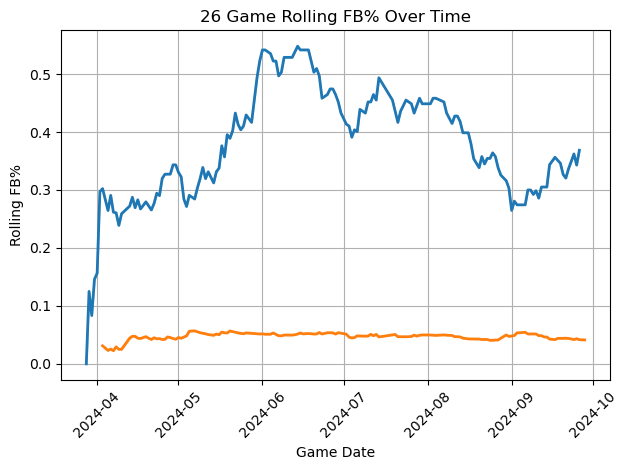

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data=judge,
    x="game_date",
    y="rolling_fb_percent",
    linewidth = 2
)

sns.lineplot(
    data=judge,
    x="game_date",
    y="rolling_outlier_prob",
    linewidth = 2
)

plt.title("26 Game Rolling FB% Over Time")
plt.xlabel("Game Date")
plt.ylabel("Rolling FB%")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [159]:
fb_min = judge["rolling_fb_percent"].min()
fb_max = judge["rolling_fb_percent"].max()

outlier_min = judge["rolling_outlier_prob"].min()
outlier_max = judge["rolling_outlier_prob"].max()

judge["scaled_outlier_to_fb"] = ((judge["rolling_outlier_prob"] - outlier_min) / 
                                 (outlier_max - outlier_min)) * (fb_max - fb_min) + fb_min


/var/folders/s2/nj72w9kx55v5zn8_gfnr84qr0000gn/T/ipykernel_2291/2733939953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judge["scaled_outlier_to_fb"] = ((judge["rolling_outlier_prob"] - outlier_min) /


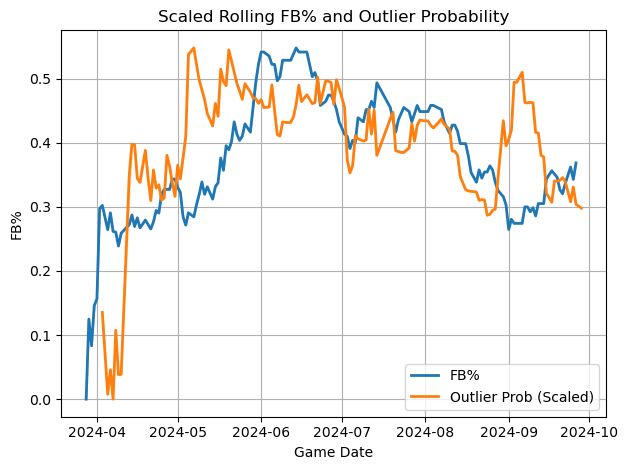

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(data=judge, x="game_date", y="rolling_fb_percent", label="FB%", linewidth=2)
sns.lineplot(data=judge, x="game_date", y="scaled_outlier_to_fb", label="Outlier Prob (Scaled)", linewidth=2)

plt.title("Scaled Rolling FB% and Outlier Probability")
plt.xlabel("Game Date")
plt.ylabel("FB%")
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()